In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import json
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
from time import time
from matplotlib import pyplot as plt
# from scipy import sparse as sp
# from scipy.special import binom
# from sklearn.base import BaseEstimator

# from corset.graph import construct_confidence_graph, show_subgraph, sample_clique, subgraph_stat
from corset.utils import pjoin ,makedir, convert_matrix_to_sets, save_pickle
from corset.data import Dataset
from corset.evaluation import TailEvaluator
# from corset.samplers.rw import RWFrequencySampler, RWAreaSampler
# from corset.samplers.fc import RCFrequencySampler
from corset.samplers.pc import PCFrequencySampler
from corset.samplers.freq import BoleyFrequencySampler
from corset.samplers.area import BoleyAreaSampler
from corset.samplers.uncovered_area import UncoveredAreaSampler
# from corset.samplers.greedy import GreedyAreaSampler

from tqdm import tqdm

In [4]:
from viz_utils import set_mpl_style, dataset_ordering
    
set_mpl_style()    

In [5]:
sample_size = 1000
output_path = '../plots/tail-sampler-comparison.pdf'
makedir(output_path, usedir=True)



def run(ds_name, sample_size, random_state=123):
    print(ds_name)
    ds = Dataset(name=ds_name, datadir='../data')
    ds.load()
    ds.build_confidence_graph()
    te = TailEvaluator(ds)

    perf = {}
    samplers = [
        # ('pc-freq', PCFrequencySampler(min_proba=0.25, random_state=random_state, do_prune_edges=True)),
        ('ours-area', UncoveredAreaSampler(min_proba=0.5, random_state=random_state, do_prune_edges=True)),
        # ('fc-freq', RCFrequencySampler(n_graph_samples=1000, min_proba=0.5, random_state=random_state)),
        # ('boley-freq', BoleyFrequencySampler(random_state=random_state)),
        ('boley-area', BoleyAreaSampler(random_state=random_state)),
    ]
    df_list = []
    for name, sampler in tqdm(samplers):
        s = time()
        # if isinstance(sampler, GreedyAreaSampler):
        #     # use both X and Y, as dense matrices 
        #     sampler.fit(ds.trn_X.toarray(), ds.trn_Y.toarray())
        # else:
        #     sampler.fit(ds.trn_Y)
        sampler.fit(ds.trn_Y)
        fit_time = time() - s
        s = time()
        tails = sampler.sample(sample_size)
        sample_time = time() - s

        sampler_perf = te.report(tails, concat_cols=True)
        sampler_perf
        sampler_perf['dataset'] = ds_name
        sampler_perf['sampler'] = name
        df_list.append(sampler_perf)
#         perf[name] = te.report(tails)
#         perf[name]['fit_time'] = fit_time
#         perf[name]['sample_time'] = sample_time

    return pd.concat(df_list, ignore_index=True)

In [6]:
# ds_name_list = ['bibtex']
ds_name_list = ['mediamill', 'Yelp', 'corel5k', 'bibtex', 'enron', 'medical', 'birds', 'emotions', 'CAL500']
perf_list = {ds_name: run(ds_name, sample_size) for ds_name in ds_name_list}

mediamill


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:42:39 pc:129] confidence graph construction: done
[D 230115 22:42:39 pc:131] converting to connectivity graph: done
[D 230115 22:42:39 pc:106] prune edges from the graph: done
[D 230115 22:42:39 pc:107] number of nodes: 101
[D 230115 22:42:39 pc:108] number of edges change: 2118 -> 380

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 69847.44it/s]
[D 230115 22:42:39 pc:120] running dfs takes: 0.01016998291015625
[D 230115 22:42:39 pc:122] sample space size: 893
[D 230115 22:42:39 PRETTI_invertedIndex:11

elapsed in dfs_v2_aux: 0.008252859115600586


[D 230115 22:42:45 PRETTI_invertedIndex:7] done
[I 230115 22:42:45 assignment:72] sample assignment done
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.85s/it]


Yelp


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:42:56 pc:129] confidence graph construction: done
[D 230115 22:42:56 pc:131] converting to connectivity graph: done
[D 230115 22:42:56 pc:106] prune edges from the graph: done
[D 230115 22:42:56 pc:107] number of nodes: 5
[D 230115 22:42:56 pc:108] number of edges change: 10 -> 6

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 25890.77it/s]
[D 230115 22:42:56 pc:120] running dfs takes: 0.0029571056365966797
[D 230115 22:42:56 pc:122] sample space size: 11
[D 230115 22:42:56 PRETTI_invertedIndex:11] bui

elapsed in dfs_v2_aux: 0.002919912338256836


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.35s/it]


corel5k


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:01 pc:129] confidence graph construction: done
[D 230115 22:43:01 pc:131] converting to connectivity graph: done
[D 230115 22:43:01 pc:106] prune edges from the graph: done
[D 230115 22:43:01 pc:107] number of nodes: 374
[D 230115 22:43:01 pc:108] number of edges change: 3536 -> 527

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [00:00<00:00, 705337.09it/s]
[D 230115 22:43:01 pc:120] running dfs takes: 0.0071680545806884766
[D 230115 22:43:01 pc:122] sample space size: 977
[D 230115 22:43:01 PRETTI_invertedIndex:

elapsed in dfs_v2_aux: 0.0070819854736328125


[D 230115 22:43:02 PRETTI_invertedIndex:7] done
[I 230115 22:43:02 assignment:72] sample assignment done
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.86s/it]


bibtex


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:06 pc:129] confidence graph construction: done
[D 230115 22:43:06 pc:131] converting to connectivity graph: done
[D 230115 22:43:06 pc:106] prune edges from the graph: done
[D 230115 22:43:06 pc:107] number of nodes: 159
[D 230115 22:43:06 pc:108] number of edges change: 3506 -> 117

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:00<00:00, 670919.86it/s]
[D 230115 22:43:06 pc:120] running dfs takes: 0.0044078826904296875
[D 230115 22:43:06 pc:122] sample space size: 286
[D 230115 22:43:06 PRETTI_invertedIndex:

elapsed in dfs_v2_aux: 0.004354715347290039


[D 230115 22:43:07 PRETTI_invertedIndex:7] done
[I 230115 22:43:07 assignment:72] sample assignment done
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.53s/it]


enron


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:11 pc:129] confidence graph construction: done
[D 230115 22:43:11 pc:131] converting to connectivity graph: done
[D 230115 22:43:11 pc:106] prune edges from the graph: done
[D 230115 22:43:11 pc:107] number of nodes: 53
[D 230115 22:43:11 pc:108] number of edges change: 576 -> 111

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 154588.39it/s]
[D 230115 22:43:11 pc:120] running dfs takes: 0.004791975021362305
[D 230115 22:43:11 pc:122] sample space size: 182
[D 230115 22:43:11 PRETTI_invertedIndex:11]

elapsed in dfs_v2_aux: 0.004720211029052734


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.11it/s]


medical


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:13 pc:129] confidence graph construction: done
[D 230115 22:43:13 pc:131] converting to connectivity graph: done
[D 230115 22:43:13 pc:106] prune edges from the graph: done
[D 230115 22:43:13 pc:107] number of nodes: 45
[D 230115 22:43:13 pc:108] number of edges change: 63 -> 23

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 45/45 [00:00<00:00, 401582.30it/s]
[D 230115 22:43:13 pc:120] running dfs takes: 0.003922939300537109
[D 230115 22:43:13 pc:122] sample space size: 69
[D 230115 22:43:13 PRETTI_invertedIndex:11] bu

elapsed in dfs_v2_aux: 0.003856182098388672


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.01it/s]


birds


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:15 pc:129] confidence graph construction: done
[D 230115 22:43:15 pc:131] converting to connectivity graph: done
[D 230115 22:43:15 pc:106] prune edges from the graph: done
[D 230115 22:43:15 pc:107] number of nodes: 19
[D 230115 22:43:15 pc:108] number of edges change: 85 -> 9

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 240035.47it/s]
[D 230115 22:43:15 pc:120] running dfs takes: 0.0031599998474121094
[D 230115 22:43:15 pc:122] sample space size: 28
[D 230115 22:43:15 PRETTI_invertedIndex:11] bu

elapsed in dfs_v2_aux: 0.0031130313873291016


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.25it/s]


emotions


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:17 pc:129] confidence graph construction: done
[D 230115 22:43:17 pc:131] converting to connectivity graph: done
[D 230115 22:43:17 pc:106] prune edges from the graph: done
[D 230115 22:43:17 pc:107] number of nodes: 6
[D 230115 22:43:17 pc:108] number of edges change: 14 -> 6

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 81180.08it/s]
[D 230115 22:43:17 pc:120] running dfs takes: 0.003435850143432617
[D 230115 22:43:17 pc:122] sample space size: 13
[D 230115 22:43:17 PRETTI_invertedIndex:11] buil

elapsed in dfs_v2_aux: 0.0033926963806152344


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.18it/s]


CAL500


  0%|                                                                                                                                                                                                                                                   | 0/2 [00:00<?, ?it/s][D 230115 22:43:20 pc:129] confidence graph construction: done
[D 230115 22:43:20 pc:131] converting to connectivity graph: done
[D 230115 22:43:20 pc:106] prune edges from the graph: done
[D 230115 22:43:20 pc:107] number of nodes: 174
[D 230115 22:43:20 pc:108] number of edges change: 10427 -> 3426

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 3146.92it/s]
[D 230115 22:43:20 pc:120] running dfs takes: 0.07145118713378906
[D 230115 22:43:20 pc:122] sample space size: 11459
[D 230115 22:43:20 PRETTI_invertedInde

elapsed in dfs_v2_aux: 0.07128286361694336


[I 230115 22:43:20 assignment:72] sample assignment done
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.06s/it]


In [7]:
df = pd.concat(perf_list, ignore_index=True)
df_aug = df.copy()
col = 'support_size'
for col in ('support_size', 'area', 'length'):
    mask = (df['metric'] == col)
    df_transformed = df[mask].copy()
    df_transformed['score'] = np.log(df_transformed['score'])
    df_transformed['metric'] = 'log(' + df_transformed['metric'] + ')'

    df_aug = pd.concat([df_aug, df_transformed])

In [8]:
df_aug['metric'].unique()

support_size_name = r'$\log(|\mathcal{D}[T]|)$'
area_name = r'$\log(area(T))$'
edge_ratio_name = r'$d(T)$'

metric_name_mapping = {
    'log(support_size)': support_size_name,
    'log(area)': area_name,
    'edge_ratio': edge_ratio_name
}
df_aug = df_aug.assign(**{
    'metric-renamed': df_aug['metric'].apply(lambda v: metric_name_mapping.get(v, v))
})

In [9]:
metrics_of_concern = {support_size_name, area_name, edge_ratio_name}
mask = df_aug['metric-renamed'].apply(lambda v: v in metrics_of_concern)
subdf = df_aug[mask]

In [10]:
# rename the sampler name
sampler_name_mapping = {'ours-area': 'interpretable', 'boley-area': 'original'}
subdf = subdf.assign(**{'sampler-renamed': subdf['sampler'].apply(lambda v: sampler_name_mapping[v])})

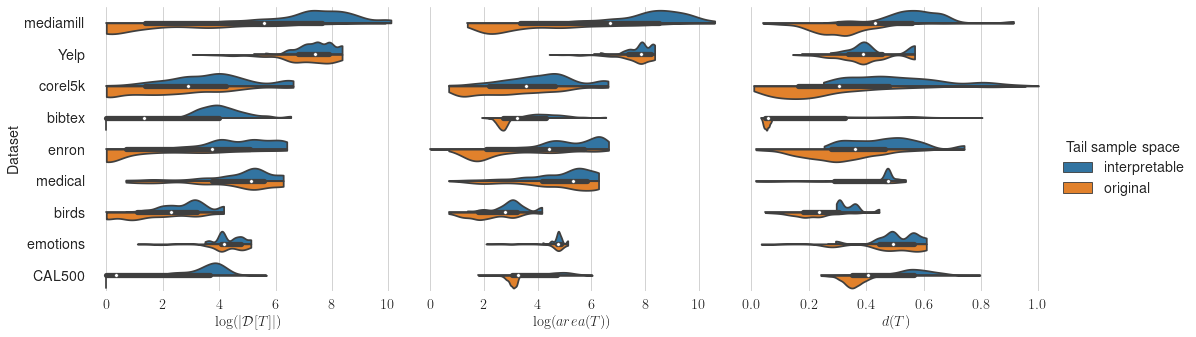

In [11]:


# make the labels more readable
subdf = subdf.rename(columns={'sampler-renamed': 'Tail sample space', 'dataset': 'Dataset'})
plot = sns.catplot(
    data=subdf, x="score", y="Dataset", hue="Tail sample space", col='metric-renamed',
    col_order=[support_size_name, area_name, edge_ratio_name],
    kind="violin", bw=.25, cut=0, split=True,
    sharex=False,
    order=dataset_ordering
)
fig = plot.figure
# fig.tight_layout()
for ax in fig.axes:
    title = ax.title.get_text()
    ax.set_title('')
    xlabel = title.split('=')[1].strip()
    ax.set_xlabel(xlabel)

fig.savefig(output_path)